# Reddit TimeZone - quick lightgbm

In [70]:
%reload_ext autoreload
%autoreload 2

from DataCollection import DataCollection
from ML import ML
import matplotlib.pyplot as plt
%matplotlib inline 

import numpy as np
import lightgbm as lgb


In [71]:
path = '/Users/rizki/Documents/Projects/withDeclan/reddit_DS/'
folder = 'savedat/'
#dataset ='losangeles_london_bali_10users_24bins_21-39-56'
dataset ='sanfrancisco_geneva_sydney_1000users_24bins_00-56-04'

['/Users/rizki/Documents/Projects/withDeclan/reddit_DS/savedat/sanfrancisco_geneva_sydney_1000users_24bins_00-56-04/aggregate_1000users_24bins_00-56-04.csv']
24


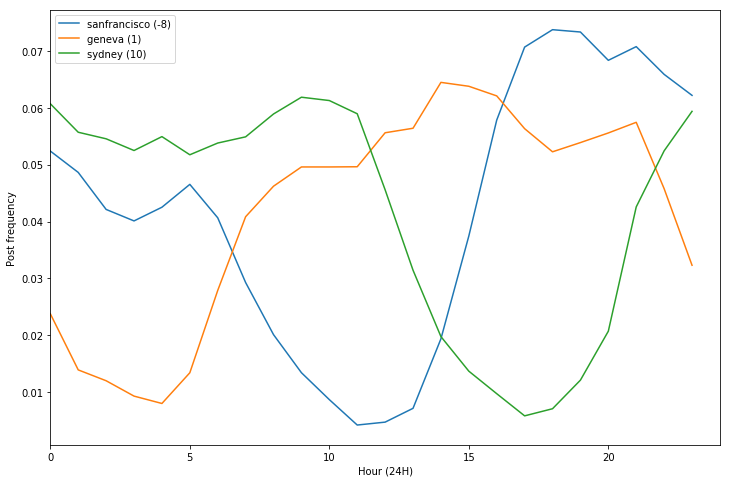

shape of X_tr: (207, 24)
shape of X_test: (89, 24)
shape of y_tr: (207,)
shape of y_test: (89,)
Training until validation scores don't improve for 100 rounds.
[60]	train's custom diff error: 1.03722	eval's custom diff error: 1.89404
[120]	train's custom diff error: 0.185443	eval's custom diff error: 1.19133
[180]	train's custom diff error: 0.0398625	eval's custom diff error: 1.11909
[240]	train's custom diff error: 0.0107751	eval's custom diff error: 1.11628
[300]	train's custom diff error: 0.00373921	eval's custom diff error: 1.11781
Did not meet early stopping. Best iteration is:
[300]	train's custom diff error: 0.00373921	eval's custom diff error: 1.11781
Plot metrics recorded during training...
Plot feature importances...


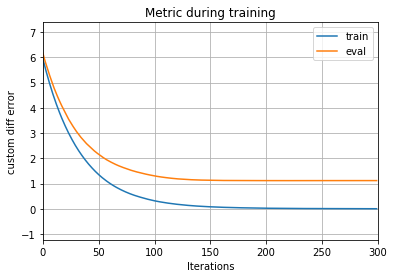

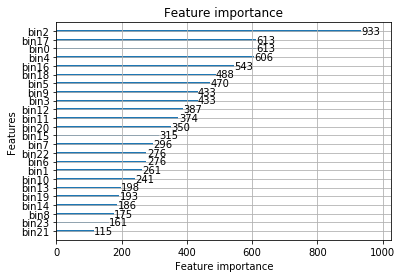

In [72]:
# ML: Boosted decision tree ( lightgbm )

ml = ML(path+folder+dataset)
ml.postAvgTimesByRegion()
ml.run_lightgbm()

['/Users/rizki/Documents/Projects/withDeclan/reddit_DS/savedat/sanfrancisco_geneva_sydney_1000users_24bins_00-56-04/aggregate_1000users_24bins_00-56-04.csv']
24


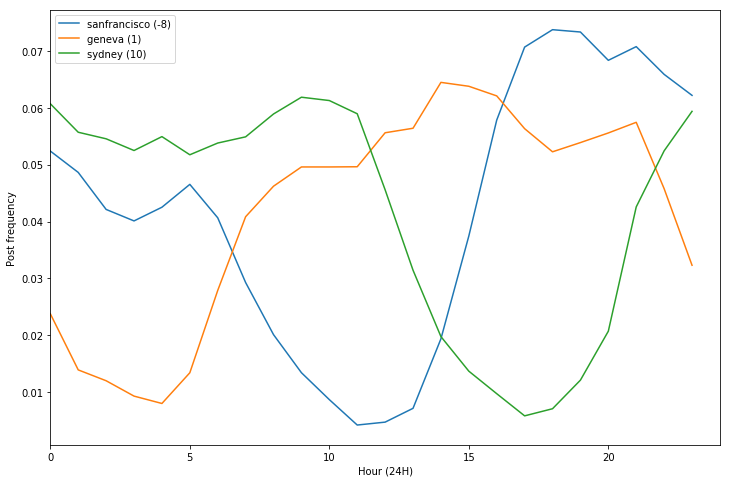

shape of X_tr: (207, 24)
shape of X_test: (89, 24)
shape of y_tr: (207,)
shape of y_test: (89,)
Training until validation scores don't improve for 100 rounds.
[60]	train's custom diff error: 1.03722	eval's custom diff error: 1.89404
[120]	train's custom diff error: 0.185443	eval's custom diff error: 1.19133
[180]	train's custom diff error: 0.0398625	eval's custom diff error: 1.11909
[240]	train's custom diff error: 0.0107751	eval's custom diff error: 1.11628
[300]	train's custom diff error: 0.00373921	eval's custom diff error: 1.11781
Did not meet early stopping. Best iteration is:
[300]	train's custom diff error: 0.00373921	eval's custom diff error: 1.11781
Plot metrics recorded during training...
Plot feature importances...


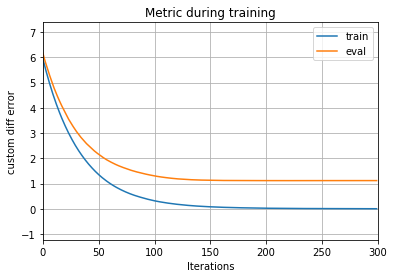

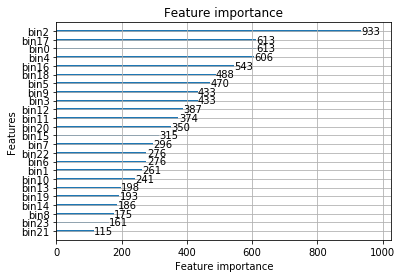

In [68]:
# x_train,x_val,y_train,y_val = ml.trainTestSplit()
# lgb_train = lgb.Dataset(x_train, label=y_train)
# lgb_test = lgb.Dataset(x_val, label=y_val)


# def custom_metric(y_pred, train_data):
#     y_true = train_data.get_label()
#     diff = np.abs(y_true - y_pred)
#     diff[diff>12] = 24 - diff
#     err=np.mean(diff)
#     return 'custom diff error',err,False

# evals_result={}
# lgb_params = {
#                'objective': 'mse', 
#                'metric': 'custom_metric',
#                'nthread':4, 
#                'learning_rate': 0.03, 
#                'verbose':1,
#                'min_data':2,
#                'min_data_in_bin':1,
#               }

# num_boost_round = 200
# verbose_eval = int(num_boost_round/5)
# model = lgb.train(lgb_params, 
#                   lgb_train,
#                   valid_sets=[lgb_train, lgb_test],
#                   valid_names=['train','eval'],
#                   num_boost_round=num_boost_round,
#                   evals_result=evals_result,
#                   early_stopping_rounds=100,
#                   verbose_eval=verbose_eval,
#                   feval=custom_metric,
#                  )
#
# print('Plot metrics recorded during training...')
# # ax = lgb.plot_metric(evals_result, metric='rmse')
# ax = lgb.plot_metric(evals_result, metric='custom diff error')
# #if(saveplots):plt.savefig(saveFolder+"/"+"lgb_plot_metric_"+saveName+".pdf")

# print('Plot feature importances...')
# ax = lgb.plot_importance(model, max_num_features=x_val.shape[1])
# # ax.figure.set_size_inches(6.4*2,4.8*3)
# # if(saveplots):plt.savefig(saveFolder+"/"+"lgb_plot_importance_"+saveName+".pdf")

# plt.show()